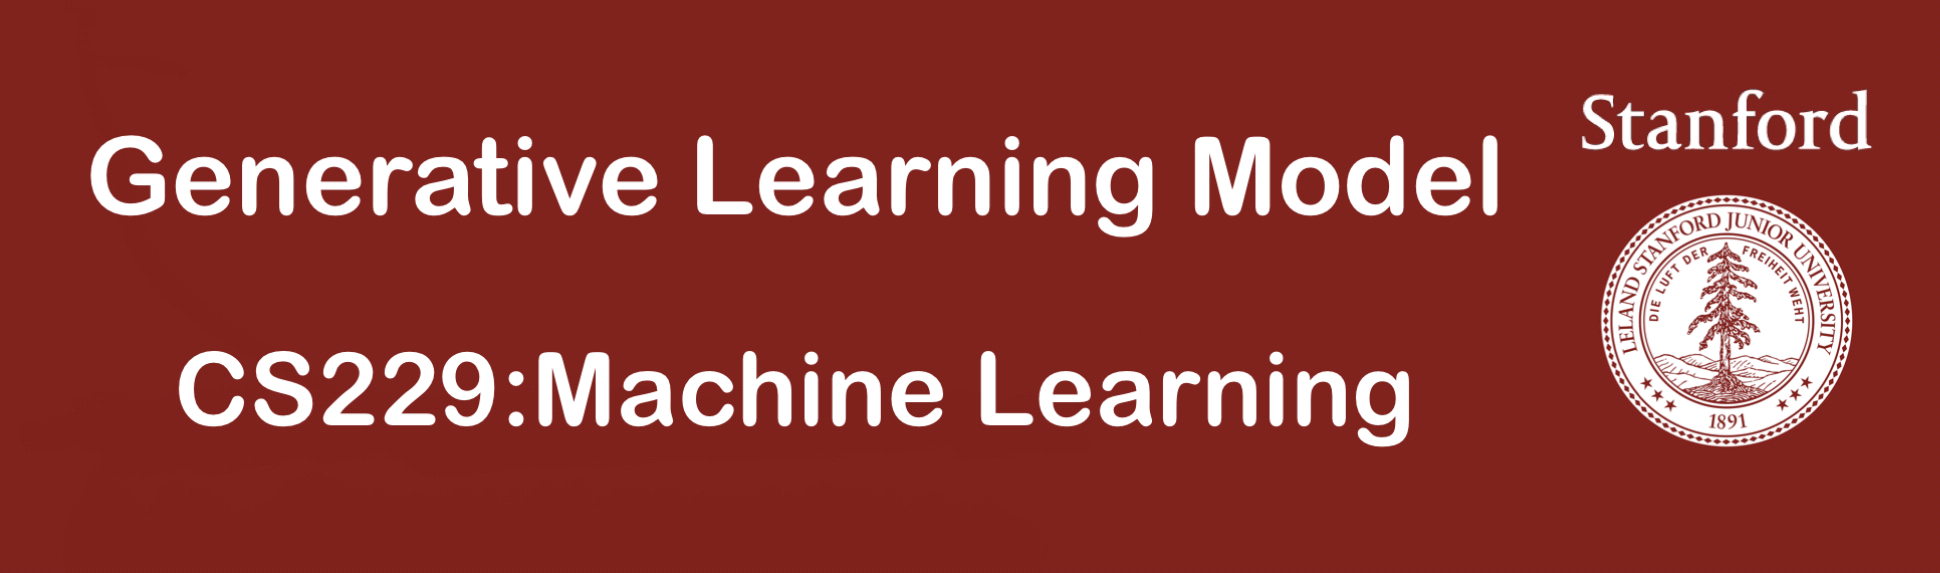

## 1 算法概述

到目前为止，我们讨论的学习算法都是直接对 $p(y|x;\theta)$ 建模，即对给定的 $x, y$ 的条件分布。这里我们将讨论一种不同类型的学习方法。

学习算法可分为两种，一种时尝试去直接学习得到 $p(y|x)$ (例如逻辑回归)，或者尝试去学习直接将输入映射到0或1的方法（例如感知器算法），这种算法被称为 **「判别学习算法(discriminative earning algorithm)」**；而另外一种学习算法被称为 **「生成学习算法generative learning algorithm」**，这种算法会尝试对 $p(x|y)$ 以及 $p(y)$ 建模。

当我们为 $p(y)$ (被称为 **「class priors」)** 和 $p(x|y)$ 建模后，我们的算法会使用 **「贝叶斯定理Bayes rule」** 来计算给定 $x$ 后 $y$ 的 **「后验概率(posterior distribution)」**：

$$p(y|x) = \frac{p(x|y)p(y)}{p(x)}$$

其中分母可以通过 $p(x)=p(x|y=1)p(y=1)+p(x|y=0)p(y=0)$ 得到（针对二分类）。

对于分类问题我们需要对每种 $y$ 的情况分别进行建模。当有一个新的 $x$ 时，计算每个 $y$ 的后验概率，并取概率最大的那个 $y$ 作为预测输出。

由于只需要比较大小，而 $p(x)$ 对于大家都一样，所以可以忽略分母，得到下式：

$$\underset{y}{\text{argmax}} p(y|x)=\underset{y}{\text{argmax}} \frac{p(x|y)p(y)}{p(x)}=\underset{y}{\text{argmax}}p(x|y)p(y)$$

## 2 高斯判别分析

我们学习的第一个生成学习算法叫 **「高斯判别分析(Gaussian discriminant analysis)」（GDA）**。在这个模型中，我们会假设 $p(x|y)$ 属于 **「多元正态分布(multivariate normal distribution)」**。在介绍 GDA 之前，首先简单介绍一下多元正态分布的属性。

### 2.1 多元正态分布

多元正态分布是在 n 维空间中的，其参数有：

* 「均值向量(mean vector)」: $\mu \in \mathbb{R}^n$

* 「协方差矩阵(covariance matrix)」: $\Sigma \in \mathbb{R}^{n \times n}, \Sigma \geq 0$ 对称且半正定（所有特征值均不小于零）

我们将分布记作 $N(\mu,\Sigma)$ ，其 **「概率密度(density)」** 公式为：

$$p(x;\mu,\Sigma)=\frac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}}\text{exp}\Big(-\frac{1}{2}(x-\mu)^T \Sigma^{-1}(x-\mu)\Big)$$

其中 $|\Sigma|$ 表示 $\Sigma$ 的行列式。对于一个属于多元正态分布 $N \sim (\mu, \Sigma)$ 的随机变量 $X$， 根据期望和方差的计算公式可以得到：

$$E[X]=\int_x xp(x;\mu, \Sigma)dx$$

$$Cov(X)=E[(X-E[X])(X-E[X])^T]=\Sigma$$

下面给出一些二元高斯分布的概率密度函数：

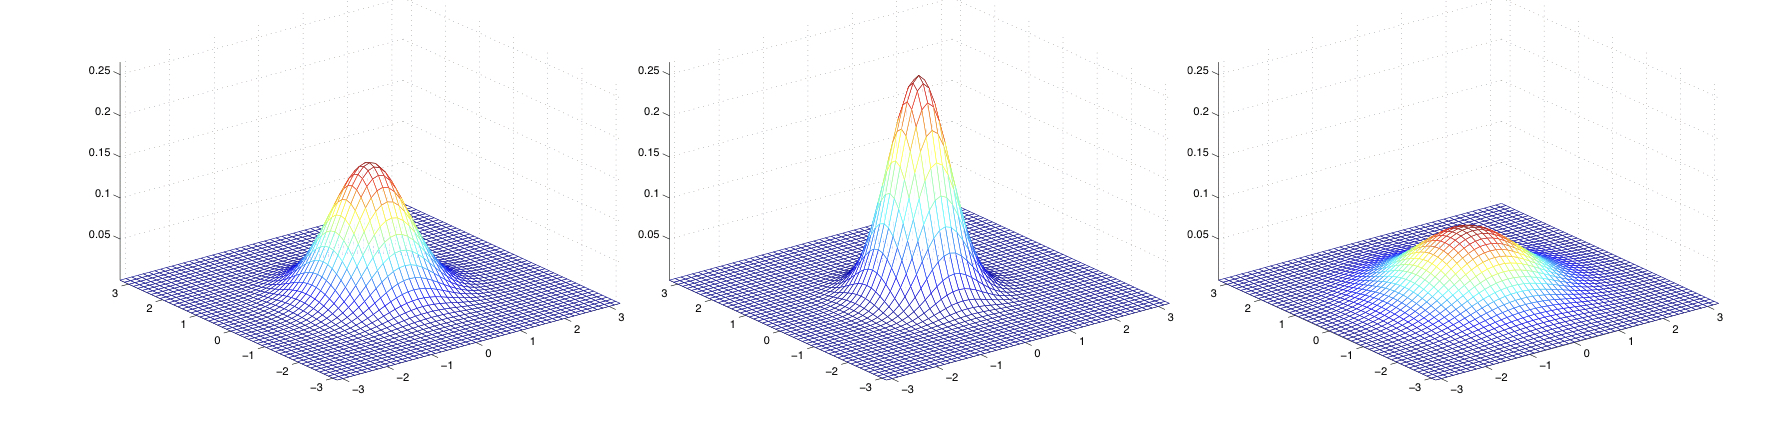

左边的图显示的分布均值为 $0$（ $2 \times 1$ 的向量），协方差矩阵为 $I$（$2 \times 2$ 的单位矩阵）。这样的正态分布又被称为 **「标准正态分布」**；中间的图显示的分布均值为 $0$ 且 $\Sigma=0.6I$；右边的图显示的分布 $\Sigma=2I$。可以看到随着 $\Sigma$ 的变大，分布变得越来越“展开”，看起来就像变得越来越“扁”。

让我们来看看更多的例子：

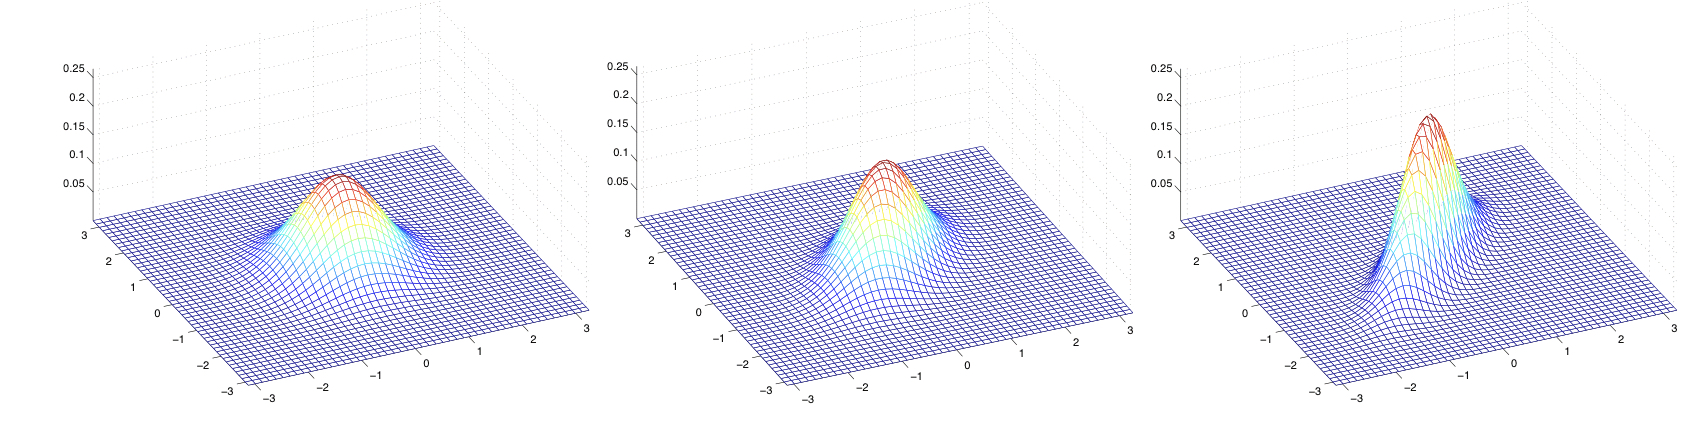

上图表示的分布均值均为 $0$ ，对应的协方差矩阵为:

$$\Sigma=
 \begin{bmatrix}
   1 & 0 \\
   0 & 1
  \end{bmatrix} ;\Sigma=
 \begin{bmatrix}
   1 & 0.5 \\
   0.5 & 1
  \end{bmatrix} ;\Sigma=
 \begin{bmatrix}
   1 & 0.8 \\
   0.8 & 1
  \end{bmatrix} 
$$

左边的图就是标准正态分布，而可以看到随着非对角线上数值的增大，分布在45度方向上压缩的幅度越大，通过下面的轮廓图可以更清楚地展现这个特点：

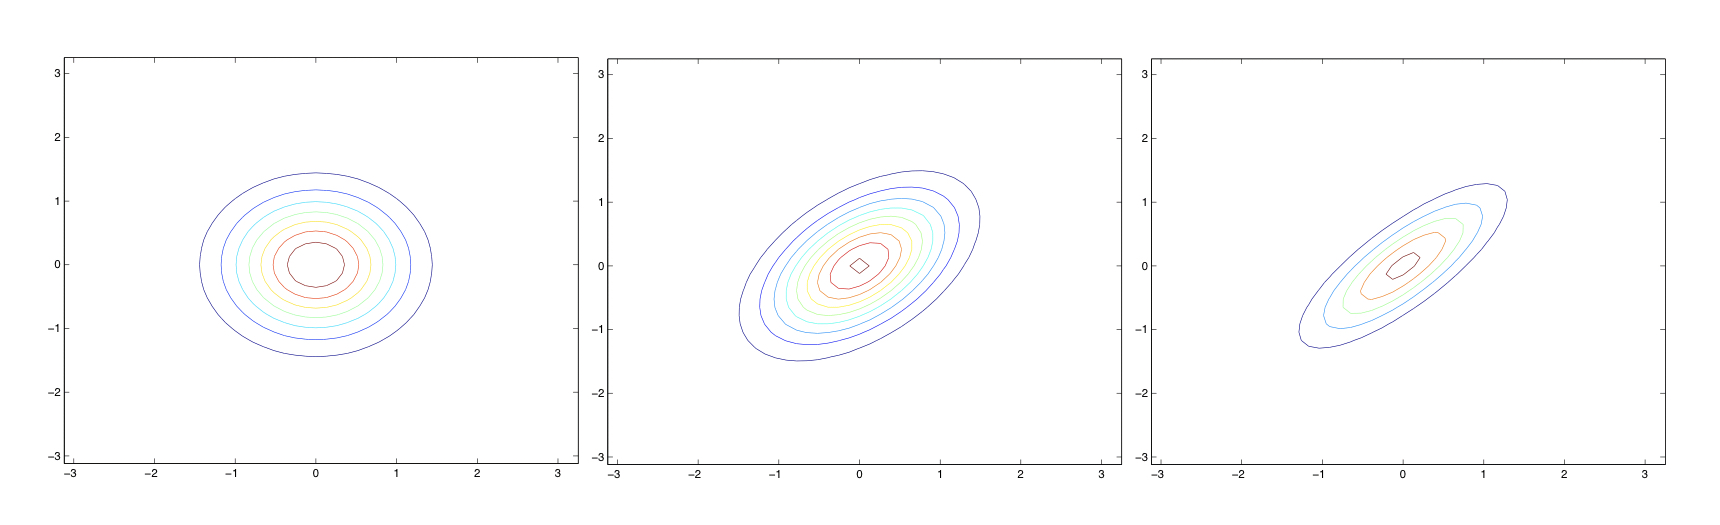

下面是另一组例子:

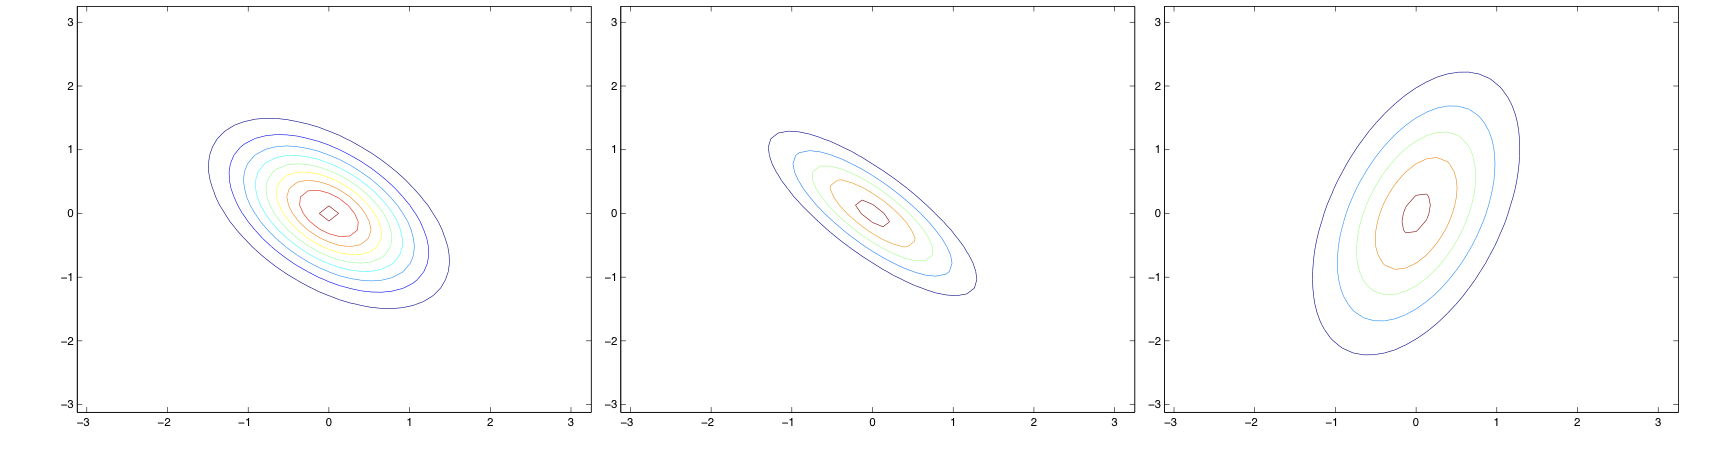

上图对应的协方差为：

$$\Sigma=
 \begin{bmatrix}
   1 & -0.5 \\
   -0.5 & 1
  \end{bmatrix} ;\Sigma=
 \begin{bmatrix}
   1 & -0.8 \\
   -0.8 & 1
  \end{bmatrix} ;\Sigma=
 \begin{bmatrix}
   3 & 0.8 \\
   0.8 & 1
  \end{bmatrix} 
$$

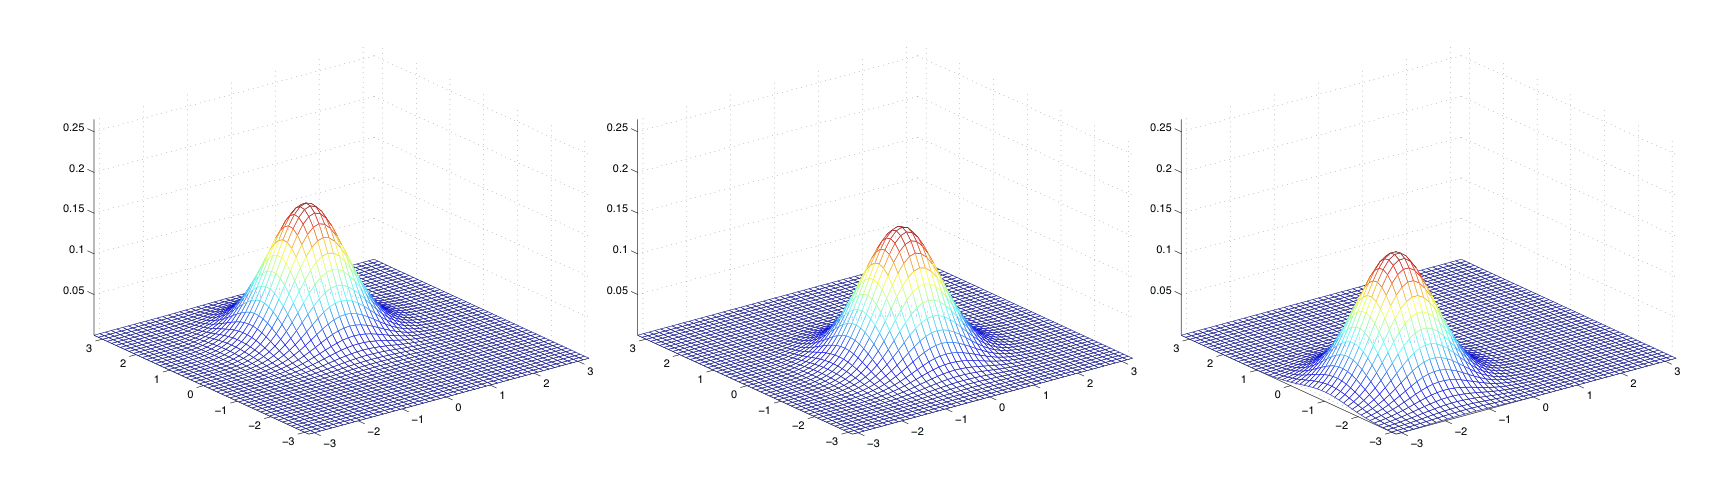

从左图和中图可以看到，随着元素值的减小（绝对值变大），分布在相反的方向上“压缩”得越明显；而在右图中我们改变了对角线上的元素值，分布变得更趋近于椭圆。

在最后一组例子中，令 $\Sigma=I$，通过改变 $\mu$ ，我们可以移动分布的中心：

总而言之，多元正态分布与正态分布一样是 **「钟型曲线」**，两个参数会影响分布的位置与形状：

* $\mu$ 会影响分布的位置（平移）
* $\Sigma$ 会影响分布的形状

### 2.2 高斯判别分析模型

对于一个分类问题，输入变量 $x$ 是连续随机变量，我们可以使用高斯判别分析(GDA)模型，对 $p(x|y)$ 使用多元正态分布建模，模型如下：

$$y \sim \text{Bernoulli}(\phi)$$

$$x|y=0 \sim \mathcal{N}(\mu_0, \Sigma)$$

$$x|y=1 \sim \mathcal{N}(\mu_1, \Sigma)$$

其概率密度如下：

$$p(y)=\phi^y (1-\phi)^{1-y}$$

$$p(x|y=0)=\frac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}}\text{exp}\Big(-\frac{1}{2}(x-\mu_0)^T \Sigma^{-1}(x-\mu_0)\Big)$$

$$p(x|y=1)=\frac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}}\text{exp}\Big(-\frac{1}{2}(x-\mu_1)^T \Sigma^{-1}(x-\mu_1)\Big)$$

这里模型的参数包括 $\phi,\Sigma,\mu_0,\mu_1$，注意两个分布 **「共享同一个协方差矩阵」**。

数据的对数似然函数如下：

$$l(\phi,\mu_0,\mu_1,\Sigma)=log\prod_{i=1}^{m}p(x^{(i)},y^{(i)};\phi,\mu_0,\mu_1,\Sigma)=log\prod_{i=1}^{m}p(x^{(i)}|y^{(i)};\phi,\mu_0,\mu_1,\Sigma)p(y^{(i)};\phi)$$

通过最大化 $l$，得到参数的最大似然估计为：

$$\phi=\frac{1}{m}\sum_{i=1}^m 1\{y^{(i)}=1\}$$

$$\mu_0=\frac{\sum_{i=1}^m 1\{y^{(i)}=0\} x^{(i)}}{\sum_{i=1}^m 1\{y^{(i)}=0\}}$$

$$\mu_1=\frac{\sum_{i=1}^m 1\{y^{(i)}=1\} x^{(i)}}{\sum_{i=1}^m 1\{y^{(i)}=1\}}$$

$$\Sigma=\frac{1}{m}\sum_{i=1}^m (x^{(i)}-\mu_{y^{(i)}})(x^{(i)}-\mu_{y^{(i)}})^T$$

用图形来表示，该算法可以表示为下图：

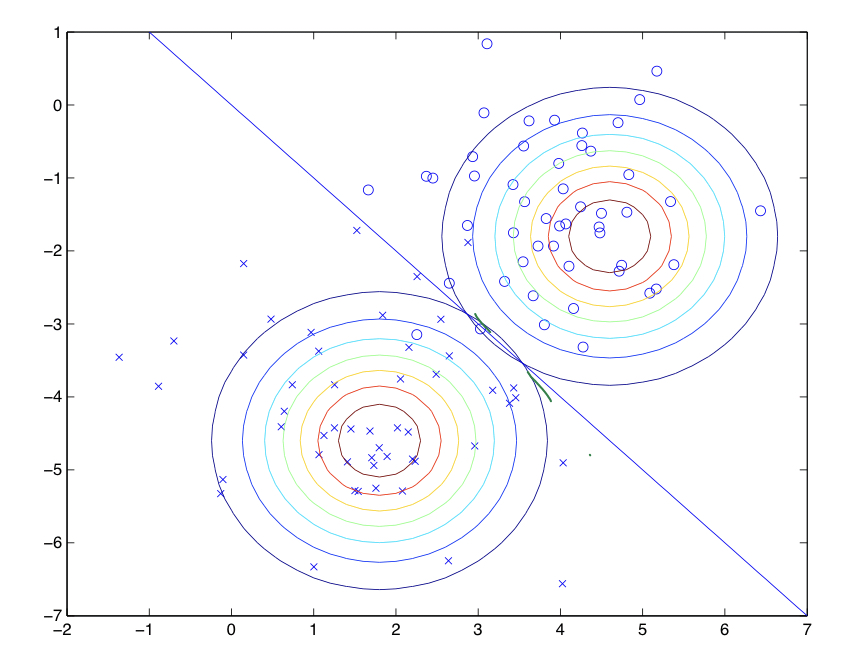

图中展示的是训练集，求得的高斯分布拟合至数据中，将数据分为了两类。注意两个高斯分布的形状相同，因为它们共享同一个协方差矩阵，但是它们的均值不同。

图中的直线表示决策边界：$p(y=1|x)=0.5$，在该边界的一侧，我们预测 $y=1$ 是最可能的输出，在另一侧，则预测 $y=0$。

### 2.3 高斯判别分析与逻辑回归

高斯判别分析与逻辑回归之间有着有趣的关系。如果我们将 $p(y=1|x;\phi,\mu_0,\mu_1,\Sigma)$ 表示为 $x$ 的函数，可以得到：

$$p(y=1|x;\phi,\Sigma,\mu_0,\mu_1)=\frac{1}{1+\text{exp}(-\theta^T x)}$$

这与逻辑回归的形式完全相同。但一般来说，对于相同的数据集两种算法会给出不同边界，究竟哪一个更好呢？

一个有趣的结论：“如果 $p(x|y)$属于多元高斯分布(共享 $\Sigma$)，那么 $p(y|x)$一定是逻辑函数，反之不成立。”

上述结论表明高斯判别分析相较于逻辑回归提出了 **「更强」** 的假设。如果这些假设都是正确的，那么高斯判别分析得到的结果会更好，是更好的模型。特别的，当$p(x|y)$ 属于多元高斯分布（共享 $\Sigma$ ），GDA 是 **「渐近有效」** 的。这说明在数据量比较有限的情况下，没有算法能比 GDA 的表现更好。因此，在这种情况下，GDA 相比逻辑回归是一个更好的算法，即使对于较少的训练集，也可以取得更好的效果。

相反，因为进行了更弱的假设，所以逻辑回归有更好的 **「鲁棒性」**，对于错误的模型假设不那么敏感。有很多不同的假设会导致 $p(y|x)$ 是逻辑函数的形式，比如泊松分布。但是如果我们对于这样的数据使用 GDA，那么结果会变得不可预测。

总结一下，GDA 进行了更强的模型假设并且数据有效性更高（需要更少的数据来学习），但其前提条件是模型假设正确或近似正确；逻辑回归进行较弱的假设，对于模型假设偏离的鲁棒性更好。如果数据集实际上不是高斯分布，那么在数据有限的情况下，逻辑回归一般会表现得比 GDA 更好。因此，实际中使用逻辑回归的情况比 GDA 多得多。

In [1]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import numpy as np 
from scipy.stats import multivariate_normal
from scipy.interpolate import griddata
import numpy.ma as ma
from numpy.random import uniform, seed
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(1)

# Hyper-parameters
fi = 0                                             # probablity of y = 1
miu_0 = np.zeros((2, 1))  # mean of y = 0
miu_1 = np.zeros((2, 1))  # mean of y = 1
COV = np.zeros((2, 2))    # convariance of two Gaussians

In [2]:
miu_0 = np.zeros((2, 1))
miu_0.shape

(2, 1)

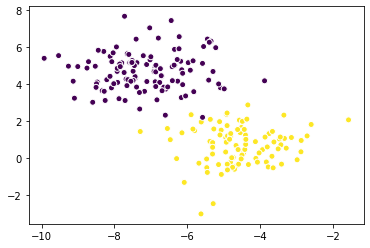

In [3]:
## 1. Generate two categories data
X, y = make_blobs(n_samples=300, n_features=2, centers=2, random_state=12)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, edgecolors='white')
plt.show()

In [4]:
def update_parameters(X_train, Y_train, fi, miu_0, miu_1, COV):
    # update μ0, μ1, φ
    l_1 = 0
    for x, y in zip(X_train, Y_train):
        x = x.reshape(2, 1)
        l_1 += 1 * y
        if y == 0:
            miu_0 += x
        else:
            miu_1 += x
    fi = l_1 / (X_train.shape[0])
    miu_0 /= (X_train.shape[0] - l_1)
    miu_1 /= l_1
    
    # update Covariance of two variables
    for x, y in zip(X_train, Y_train):
        x = x.reshape(2, 1)
        if y == 0:
            COV += np.matmul(x - miu_0, (x - miu_0).T)
        else:
            COV += np.matmul(x - miu_1, (x - miu_1).T)
    COV /= X_train.shape[0]
    return fi, miu_0, miu_1, COV

def tow_d_gaussian(x, mu, COV):
    n = mu.shape[0]
    COV_det = np.linalg.det(COV)  #行列式 determinant
    COV_inv = np.linalg.inv(COV) 
    N = np.sqrt((2*np.pi)**n*COV_det)
    fac = np.einsum('...k,kl,...l->...',x-mu, COV_inv, x-mu)
    return np.exp(-fac/2)/N

In [5]:
X_train.shape, Y_train.shape

((210, 2), (210,))

In [6]:
fi, miu_0, miu_1, COV = update_parameters(X_train, Y_train, fi, miu_0, miu_1, COV)

In [7]:
miu_0.shape, miu_1.shape, COV.shape

((2, 1), (2, 1), (2, 2))

(60, 60) (60, 60)


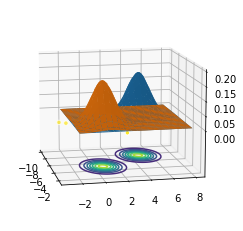

In [15]:
# plotting
fig =plt.figure()
ax = fig.gca(projection='3d') # 3d plotting
ax = fig.gca()
ax.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, edgecolors='white')
N = 60
X = np.linspace(-10,-2,N)
Y = np.linspace(-2,8,N)
X,Y = np.meshgrid(X,Y)
print(X.shape, Y.shape)

pos = np.empty(X.shape+(2,))
pos[:,:,0]= X
pos[:,:,1] = Y

miu_0 = np.reshape(miu_0, (1, 2))[0]
miu_1 = np.reshape(miu_1, (1, 2))[0]
Z1 = tow_d_gaussian(pos, miu_0, COV)
Z2 = tow_d_gaussian(pos, miu_1, COV)

cset = ax.contour(X,Y,Z1,zdir='z',offset=-0.15)
cset = ax.contour(X,Y,Z2,zdir='z',offset=-0.15)
# 3d plotting
ax.plot_surface(X,Y,Z1,rstride=3,cstride=3,linewidth=1,antialiased =True)
ax.plot_surface(X,Y,Z2,rstride=3,cstride=3,linewidth=1,antialiased =True)
    
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(12,-12)
plt.show()

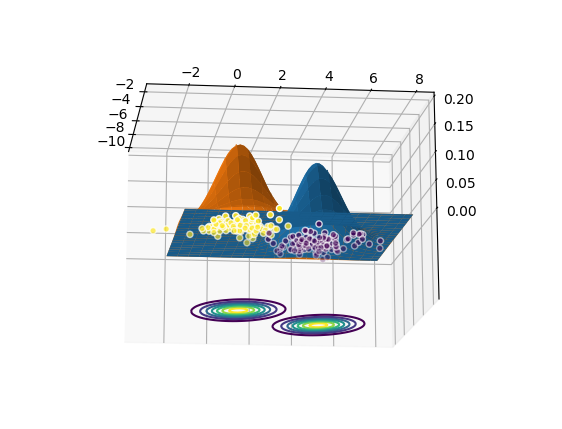

## 3 朴素贝叶斯算法

### 3.1 算法概述

在高斯判别分析中，输入是连续变量。现在我们要谈谈一个不同的生成学习算法，其中 $x$ 是 **「离散变量」**。

让我们以识别垃圾邮件为例，这类问题被称为「文本分类」问题。假设我们有一个训练集（已经标记好了是否为垃圾邮件的邮件集合），我们首先需要构建表示一封邮件的特征向量。

我们通过如下方式表示特征向量：其长度为词表的长度，词表为所有可能出现的词的集合，一般通过训练集生成。如果这封邮件包含了第 $i$ 个词，$x_i=1$，否则 $x_i=0$。下图为一个简单的例子：

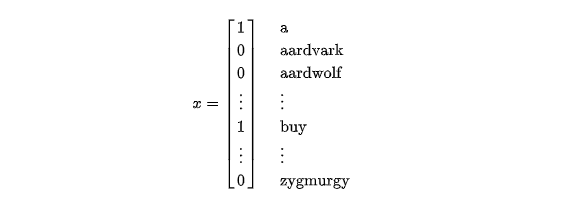

选择好特征向量后，我们需要来构建生成模型。但考虑到 $x$ 是一个高维向量，因此如果直接对 $p(x|y)$ 建模，那么会得到一个参数向量的维度极高的多项分布，是计算过于复杂。

因此我们需要有一个强力的假设，假设给定 $y$ 时，每一个 $x_i$ 是条件独立的。这个假设被称为 **「朴素贝叶斯假设」**，其引出的算法被称为 **「朴素贝叶斯分类器」**。注意是条件独立而不是独立，即仅在给定 $y$ 的情况下独立。

现在我们有（以50000维度为例）：

$$p(x_1,...,x_50000|y)=p(x_1|y)p(x_2|y,x_1)p(x_3|y,x_1,x_2)...p(x_50000|y,x_1,...,x_49000)=p(x_1|y)p(x_2|y)...p(x_50000|y)=
\prod_{j=1}^n p(x_j|y)$$

第一个等式来自于概率的基本性质；第二个等式则使用了朴素贝叶斯假设。即使这个假设在现实中不一定成立，但其实际的效果还是不错的。

模型包含了以下三个参数：

$$\phi_{i|y=1}=p(x_i=1|y=1)$$

$$\phi_{i|y=0}=p(x_i=1|y=0)$$

$$\phi_y = p(y=1)$$

和之前一样，给定一个训练集 $\{(x^{(i),y^{(i)}});i=1,...,m\}$，我们可以写出如下的联合似然函数

$$L(\phi_y,\phi_{i|y=0},\phi_{i|y=1})=\prod_{i=1}^m p(x^{(i)},y^{(i)})$$

对这个联合似然函数进行最大似然分析，得到的参数值如下：

$$\phi_{j|y=1}=\frac{\sum_{i=1}^m 1\{x_j^{(i)}=1 \wedge y^{(i)}=1 \}}{\sum_{i=1}^m 1 \{y^{(i)}=1 \}}$$

$$\phi_{j|y=0}=\frac{\sum_{i=1}^m 1\{x_j^{(i)}=1 \wedge y^{(i)}=0 \}}{\sum_{i=1}^m 1 \{y^{(i)}=0 \}}$$

$$\phi_y = \frac{\sum_{i=1}^m 1 \{y^{(i)}=1\}}{m}$$

这些结果的得出是很自然的，从概率的角度也可以很好地解释。得到了这些参数之后，为了对一个新的输入 $x$ 进行预测，我们可以计算：

$$p(y=1|x)=\frac{p(x|y=1)p(y=1)}{p(x)}=\frac{\big(\prod_{i=1}^n p(x_i|y=1)\big)p(y=1)}{\big(\prod_{i=1}^n p(x_i|y=1)\big)p(y=1)+\big(\prod_{i=1}^n p(x_i|y=0)\big)p(y=0)}$$

然后选择具有更高后验概率的类作为输出。这里的 $n$ 指字典的维数，需要先把 $x$ 转换为统一长度的向量。

在之前的例子中，输入的每一维特征都是是二元的，其对应的分布是伯努利分布。而当特征是多元时，其对应的分布应该用 **「多项式分布」** 建模。

实际上，即便一些原始的输入数据是连续值，我们可以通过一个映射表将连续值映射为离散值，然后运用朴素贝叶斯方法进行建模：

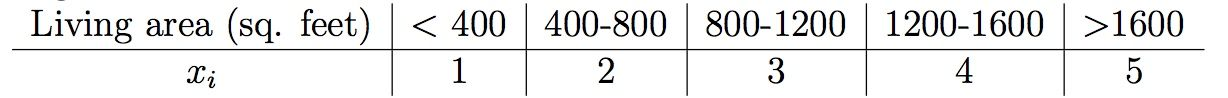

当原始连续值的数据不能很好的用多元正态分布进行建模时，将其离散化再使用朴素贝叶斯建模往往会取得更好的效果。

### 3.2 拉普拉斯平滑

朴素贝叶斯算法有很多的应用，但是其当前的形式仍存在一个问题：在垃圾邮件分类问题中，如果词典中存在一个词，而这个词在训练集中从未出现过时，其最大似然分析得出的参数 $\phi_{35000|y}$ 将会是：

$$\phi_{35000|y=1}=\frac{\sum_{i=1}^m 1\{x_35000^{(i)}=1 \wedge y^{(i)}=1 \}}{\sum_{i=1}^m 1 \{y^{(i)}=1 \}}=0$$

$$\phi_{35000|y=0}=\frac{\sum_{i=1}^m 1\{x_35000^{(i)}=1 \wedge y^{(i)}=0 \}}{\sum_{i=1}^m 1 \{y^{(i)}=0 \}}=0$$

因此，当我们尝试去预测含有该词的邮件是否为垃圾邮件时，后验概率的计算结果将变为：

$$p(y=1|x)=\frac{p(x|y=1)p(y=1)}{p(x)}=\frac{\big(\prod_{i=1}^n p(x_i|y=1)\big)p(y=1)}{\big(\prod_{i=1}^n p(x_i|y=1)\big)p(y=1)+\big(\prod_{i=1}^n p(x_i|y=0)\big)p(y=0)}=\frac{0}{0}$$

这会导致我们无法进行预测。更一般的来看，如果你在有限的训练集上没有看到过某个事件，就认为其发生的概率为 0，这在统计学上是不合理的。

现在假设我们要分析一个多项式随机变量 $z$ 的均值，取值为 $\{1,...,k\}$，我们可以分析 $\phi_j=p(z=j)$。给定一个独立的观察集 $\{z^{(1),...,z^{(m)}}\}$，最大似然估计结果为：

$$\phi_j = \frac{\sum_{i=1}^m 1\{ z^{(i)}=j\}}{m}$$

如果我们用这个公式来进行最大似然估计，那么有些 $\phi_j$ 的值可能为0（如果未在观察集中出现）。为了避免这个问题，我们可以使用 **「拉普拉斯平滑(Laplace smoothing)」** ，其形式为：

$$\phi_j = \frac{\sum_{i=1}^m 1\{ z^{(i)}=j\}+1}{m+k}$$

分子加 $1$，分母加 $k$，这样可以保证 $\sum_{j=1}^m \phi_j = 1$（概率之和为1）。同时保证了对所有的取值，$\phi_j \neq 0$，从而解决了之前的问题。实验证明，在大部分情况下，拉普拉斯平滑可以给出一个最优的估计。

对于朴素贝叶斯分类器，使用拉普拉斯平滑，可以得到如下公式：

$$\phi_{j|y=1}=\frac{\sum_{i=1}^m 1\{x_j^{(i)}=1 \wedge y^{(i)}=1 \}+1}{\sum_{i=1}^m 1 \{y^{(i)}=1 \}+2}$$

$$\phi_{j|y=0}=\frac{\sum_{i=1}^m 1\{x_j^{(i)}=1 \wedge y^{(i)}=0 \}+1}{\sum_{i=1}^m 1 \{y^{(i)}=0 \}+2}$$

因为 $x$ 的取值有两种，所以分子加 $1$，分母加 $2$。在实际应用中，一般不需要对 $\phi_y$ 进行拉普拉斯平滑。

### 3.3 文本分类的事件模型

让我们再探讨一个专门用于文本分类的模型来结束生成学习算法。虽然朴素贝叶斯对许多分类问题有很好的效果，但是对于文本分类，还存在着一个效果更棒的相关模型。

在文本分类领域，之前我们使用的朴素贝叶斯模型被称为「多元伯努利事件模型」。现在我们将使用一个不同的模型，叫作「多项式事件模型」。我们将使用与之前不同的方式来表示一封邮件：

令 $x_i$ 表示邮件中的第 $i$ 个词语，则其取值范围为 $\{1,...,|V|\}$，$|V|$ 是词表（词典）的大小。一封含有 $n$ 个词语的邮件现在将被表示为一个长度为 $n$ 的向量 $(x_1,x_2,...,x_n)$，注意 $n$ 会随邮件的不同而变化。

该模型的参数为：

$$\phi_{i|y=1}=p(x_i=1|y=1)$$

$$\phi_{i|y=0}=p(x_i=1|y=0)$$

$$\phi_y = p(y=1)$$

我们假设 $p(x_j|y)$ 对所有的 $j$（邮件中词的位置）都是一样的。

如果给定一个训练集 $\{(x^{(i)},y^{(i)});i=1,...,m\}$，其中 $x^{(i)}=(x_1^{(i)},x_2^{(i)},...,x_{n_i}^{(i)})$。这里 $n_i$ 表示第 $i$ 个训练样本的词数，那么数据的似然函数可以表示为:

$$L(\phi_y,\phi_{i|y=0},\phi_{i|y=1})=\prod_{i=1}^m p(x^{(i)},y^{(i)})=\prod_{i=1}^m(\prod_{j=1}^{n_i}p(x_j^{(i)}|y;\phi_{i|y=0},\phi_{i|y=1}))p(y^{(i)};\phi_y)$$

最大似然估计得出的结果如下：

$$\phi_{k|y=1}=\frac{\sum_{i=1}^m \sum_{j=1^{n_i}}1\{x_j^{(i)}=k \wedge y^{(i)}=1 \}}{\sum_{i=1}^m 1 \{y^{(i)}=1 \}n_i}$$

$$\phi_{k|y=0}=\frac{\sum_{i=1}^m \sum_{j=1^{n_i}}1\{x_j^{(i)}=k \wedge y^{(i)}=0 \}}{\sum_{i=1}^m 1 \{y^{(i)}=0 \}n_i}$$

$$\phi_y = \frac{\sum_{i=1}^m 1 \{y^{(i)}=1\}}{m}$$

可以看到，这里在考虑字典中索引为 $k$ 的词时，会把在每个文本中出现的次数相加。所以该模型相比于之前的模型，不仅仅考虑是否出现，还考虑了「出现的次数」。

如果要应用拉普拉斯平滑，可以在分子加 $1$，分母加 $|V|$，得到：

$$\phi_{k|y=1}=\frac{\sum_{i=1}^m \sum_{j=1^{n_i}}1\{x_j^{(i)}=k \wedge y^{(i)}=1 \}+1}{\sum_{i=1}^m 1 \{y^{(i)}=1 \}n_i+|V|}$$

$$\phi_{k|y=0}=\frac{\sum_{i=1}^m \sum_{j=1^{n_i}}1\{x_j^{(i)}=k \wedge y^{(i)}=0 \}+1}{\sum_{i=1}^m 1 \{y^{(i)}=0 \}n_i+|V|}$$

虽然朴素贝叶斯不是最好的分类算法，但因为其易于实现，所以非常适合作为你的第一个尝试。

In [19]:
email_data = pd.read_csv('./naive_bayes/data/spam-utf8.csv', encoding='utf-8')
email_data

v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham               Will 蘝 b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  
2           NaN        NaN  
3           NaN        NaN  
4           NaN        NaN  
...         ...        ...  
5567        NaN        NaN  
5568        NaN        NaN  
5569        NaN        NaN  
5570        NaN        NaN  
5571        NaN        NaN  

[5572 rows x 5 columns]

In [21]:
# Transform into two categories 0 and 1
ins = {'ham': '0', 'spam': '1'}
email_data = email_data.replace({'v1':ins})
email_data['v1'] = email_data['v1'].astype('int32') 
print(email_data['v1'])

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5572, dtype: int32


In [24]:
# Create a dictionary
email_content = email_data['v2']
email_content

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will 蘝 b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

## 知识点补充-np.einsum：

### 1. 对于两个向量而言

给定 $\vec a$ 和 $\vec b$（在python中也可以称为一维数组），若 $\vec a=(1,2,3), \vec b=(4,5,6)$，即

In [3]:
import numpy as np
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

则：

* `np.eiusum('i', a)`返回向量 $\vec a$本身，即

In [5]:
np.einsum('i', a)

array([1, 2, 3])

* `np.einsum('i->',a)`返回向量 $\vec a$ 的元素和(等价于：`np.sum(a)`)，即

In [6]:
np.einsum('i->', a)

6

* `np.einsum('i,i->i',a,b)`是向量 $\vec a$和向量 $\vec b$的点乘（等价于: $a * b$）

$\vec a * \vec b=(1 \times 4, 2 \times 5, 3 \times 6)=(4,10,18)$ 

即：

In [7]:
np.einsum('i,i->i',a ,b)

array([ 4, 10, 18])

* `np.einsum('i,i', a, b)`是向量 $\vec a$和向量 $\vec b$的内积（等价于：`np.inner(a, b)`）

In [8]:
np.einsum('i, i', a, b)

32

* `np.einsum('i,j->ij', a, b)`是向量 $\vec a$和向量 $\vec b$的外积（等价于：`np.outer(a, b)`）

$\vec a \circ \vec b=\begin{bmatrix}
   4 & 5 & 6 \\
   8 & 10 & 12 \\
   12 & 15 & 18
  \end{bmatrix}$

即：

In [9]:
a

array([1, 2, 3])

In [10]:
b

array([4, 5, 6])

In [11]:
np.einsum('i,j->ij', a, b)

array([[ 4,  5,  6],
       [ 8, 10, 12],
       [12, 15, 18]])

### 2.对于两个矩阵而言

给定向量 $\vec a$和向量 $\vec b$（在python中也可以称为二维数组），若$A=\begin{bmatrix}
   1 & 2 \\
   3 & 4
  \end{bmatrix},B=\begin{bmatrix}
   5 & 6 \\
   7 & 8
  \end{bmatrix}$,即

In [12]:
A = np.array([[1, 2],[3, 4]])
B = np.array([[5, 6],[7, 8]])

则：

* `np.einsum('ij', A)`返回矩阵 $A$本身，`np.einsum('ji', A)`返回矩阵 $A$的转置(等价于：$A.T$)，即

In [13]:
np.einsum('ij', A)

array([[1, 2],
       [3, 4]])

In [14]:
np.einsum('ji', A)

array([[1, 3],
       [2, 4]])

* `np.einsum('ii->i', A)`返回矩阵 $A$ 对角线上的元素（等价于：`np.diag(A)`），即

In [15]:
np.einsum('ii->i', A)

array([1, 4])

* `np.einsum('ii', A)`返回矩阵 $A$ 对角线上元素的和（等价于：`np.trace(A)`），即

In [16]:
np.einsum('ii', A)

5

* `np.einsum('ij->', A)`返回矩阵 $A$ 所有元素的和（等价于：`np.sum(A)`），即

In [17]:
np.einsum('ij->', A)

10

* `np.einsum('ij->j', A)`返回矩阵 $A$ 列向量的和（等价于：`np.sum(A, axis=0)`）

* `np.einsum('ij->i', A)`返回矩阵 $A$ 行向量的和（等价于：`np.sum(A, axis=1)`），即

In [19]:
print(A)
np.einsum('ij->j', A)

[[1 2]
 [3 4]]


array([4, 6])

In [20]:
np.einsum('ij->i', A)

array([3, 7])

* `np.einsum('ij, ij->ij', A, B)`是矩阵 $A$ 和矩阵 $B$ 的点乘（等价于：$A*B$），即

In [22]:
print(A)
print(B)
np.einsum('ij,ij->ij', A, B)

[[1 2]
 [3 4]]
[[5 6]
 [7 8]]


array([[ 5, 12],
       [21, 32]])

* `np.einsum('ij, ji->ij', A, B)`是矩阵 $A$点乘以矩阵 $B$的转置（等价于：$A*B.T$），即

In [23]:
np.einsum('ij, ji->ij', A, B)

array([[ 5, 14],
       [18, 32]])

* `np.einsum('ij, jk', A, B)`是矩阵 $A$ 乘以矩阵 $B$ —— $AB$（等价于：`np.dot(A, B)`），即

In [24]:
print(A)
print(B)
np.einsum('ij, jk', A, B)

[[1 2]
 [3 4]]
[[5 6]
 [7 8]]


array([[19, 22],
       [43, 50]])

* `np.einsum('ij, ij', A, B)`是矩阵 $A$ 和矩阵 $B$ 的内积,$<A, B>=\sum_i\sum_j a_{ij}b_{ij}$

In [25]:
np.einsum('ij, ij', A, B) # 1*5+2*6+3*7+4*8=5+12+21+32=70

70

### 3. 张量与矩阵相乘（model product）

若给定张量 $\chi$ 为 $\chi(:,:,1)=\begin{bmatrix}
   1 & 2 \\
   3 & 4
  \end{bmatrix},\chi(:,:,2)=\begin{bmatrix}
   5 & 6 \\
   7 & 8
  \end{bmatrix}$, 其大小为 $2\times 2\times 2$，另外给定矩阵 $A=\begin{bmatrix}
   1 & 2 \\
   3 & 4 \\
   5 & 6
  \end{bmatrix}$，试想一下：张量 $\chi$ 和矩阵 $A$ 相乘会得到什么？

In [26]:
X = np.array([[[1, 5], [2, 6]], [[3, 7], [4, 8]]])
A = np.array([[1, 2], [3, 4], [5, 6]])
print(X[:, :, 0])
print()
print(X[:, :, 1])

[[1 2]
 [3 4]]

[[5 6]
 [7 8]]
